## Customer Segmentation for Automobile Company

<u>Context</u>

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

<u>Content</u>

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

Acknowledgements

https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/#ProblemStatement

Inspiration

https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/#ProblemStatement

Dataset Source

https://www.kaggle.com/vetrirah/customer

### __1. Data Preprocessing__ 

The first step in building the model is to importing Libraries and understanding features within the unprocessed dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

__a. Sample Submission Data__

In [2]:
df1 = pd.read_csv('./Files/sample_submission.csv')
df1.head()

,ID,Segmentation
0,458989,A
1,458994,A
2,458996,A
3,459000,A
4,459001,A


In [3]:
listItem = []
for col in df1.columns:
    listItem.append([col, df1[col].dtype,
                   df1[col].isna().sum(),
                   round((df1[col].isna().sum()/len(df1[col])) *100, 2),
                   df1[col].nunique(), list(df1[col].unique()[:5])]);

df1Desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)

df1Desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,int64,0,0.0,2627,"[458989, 458994, 458996, 459000, 459001]"
1,Segmentation,object,0,0.0,1,[A]


In [4]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2627.0,463433.918919,2618.245698,458989.0,461162.5,463379.0,465696.0,467968.0


__b. Train and Test Data__

Columns Explanation:

- Work_Experience = customer's work experience in Years.
- Graduated = indication whether the customer has graduated.
- Family_Size = Number of family members including the customer.
- Spending_Score = Spending score of the customer.
- Var_1 = Anonymised Category for the customer.
- Segmentation = (target) Customer Segment of the Customer.

Dataframe preparation

In [5]:
dfTr = pd.read_csv('./Files/Train.csv')
dfTr.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [6]:
dfTs = pd.read_csv('./Files/Test.csv')
dfTs.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [7]:
print(dfTr.shape)
print(dfTs.shape)

(8068, 11)
(2627, 10)


Comments:

- The train data has 8068 rows, and 11 columns. 
- Whereas the test data consists of 2627 rows and 10 columns.
- The test data has 1 less column, which is due to "Segmentation" being the target.
- Thus, the ratio of train to test data is 3:1 which is quite good for the model. 24.5% of the whole data available for the model training.

__c. Dataframe Information__

__c.1. Train Dataframe__

In [8]:
#Function to describe Dataframe

def describeDF(x):
    listItem = []
    for col in x.columns:
        listItem.append([col, x[col].dtype,
                       x[col].isna().sum(),
                       round((x[col].isna().sum()/len(x[col])) *100, 2),
                       x[col].nunique(), list(x[col].unique()[:5])]);

    desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                         data=listItem)
    return desc

In [9]:
describeDF(dfTr)

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,int64,0,0.00,8068,"[462809, 462643, 466315, 461735, 462669]"
1,Gender,object,0,0.00,2,"[Male, Female]"
2,Ever_Married,object,140,1.74,2,"[No, Yes, nan]"
3,Age,int64,0,0.00,67,"[22, 38, 67, 40, 56]"
4,Graduated,object,78,0.97,2,"[No, Yes, nan]"
5,Profession,object,124,1.54,9,"[Healthcare, Engineer, Lawyer, Entertainment, ..."
6,Work_Experience,float64,829,10.28,15,"[1.0, nan, 0.0, 4.0, 9.0]"
7,Spending_Score,object,0,0.00,3,"[Low, Average, High]"
8,Family_Size,float64,335,4.15,9,"[4.0, 3.0, 1.0, 2.0, 6.0]"
9,Var_1,object,76,0.94,7,"[Cat_4, Cat_6, Cat_7, Cat_3, Cat_1]"


In [10]:
dfTr.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8068.0,463479.214551,2595.381232,458982.0,461240.75,463472.5,465744.25,467974.0
Age,8068.0,43.466906,16.711696,18.0,30.00,40.0,53.00,89.0
Work_Experience,7239.0,2.641663,3.406763,0.0,0.00,1.0,4.00,14.0
Family_Size,7733.0,2.850123,1.531413,1.0,2.00,3.0,4.00,9.0


Comments:

- There are a very high percentage of null value (10.28%) in Work_Experience which might affect the model later on. This is perhaps due to the unwillingness of customer to state their job, or they are still looking for a steady job.
- Family_Size has 4.15 % of null value, meaning that some user prefer to keep their privacy.
- Ever_Married, Profession, Graduated and Var_1 both have less than 2% of null value.
- Must consider what to do with the null value, since it might affect the model performance.

__more comments on the statistic distribution__

__c.2. Test Dataframe__

In [11]:
describeDF(dfTs)

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,int64,0,0.00,2627,"[458989, 458994, 458996, 459000, 459001]"
1,Gender,object,0,0.00,2,"[Female, Male]"
2,Ever_Married,object,50,1.90,2,"[Yes, No, nan]"
3,Age,int64,0,0.00,67,"[36, 37, 69, 59, 19]"
4,Graduated,object,24,0.91,2,"[Yes, No, nan]"
5,Profession,object,38,1.45,9,"[Engineer, Healthcare, nan, Executive, Marketing]"
6,Work_Experience,float64,269,10.24,15,"[0.0, 8.0, 11.0, nan, 5.0]"
7,Spending_Score,object,0,0.00,3,"[Low, Average, High]"
8,Family_Size,float64,113,4.30,9,"[1.0, 4.0, 2.0, 5.0, 3.0]"
9,Var_1,object,32,1.22,7,"[Cat_6, Cat_4, Cat_3, nan, Cat_1]"


In [12]:
dfTs.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2627.0,463433.918919,2618.245698,458989.0,461162.5,463379.0,465696.0,467968.0
Age,2627.0,43.649791,16.967015,18.0,30.0,41.0,53.0,89.0
Work_Experience,2358.0,2.552587,3.341094,0.0,0.0,1.0,4.0,14.0
Family_Size,2514.0,2.825378,1.551906,1.0,2.0,2.0,4.0,9.0


Comments:
- The test data is also filled with most null data in Work_Experience, which means this might be quite an important feature in determining the Segmentation.
- Overall, the features with most null values are also similar with the train data.

### __2. Exploratory Data Analysis (EDA)__

__a. Data Cleansing__

Based on the high percentage of null values in Train Data, columns that contain null values in order are as follow (including the datatypes):

1. Work_Experience - 10.28% - float64
2. Family_Size - 4.15% - float64
3. Ever_Married - 1.74% - object
4. Profession - 1.54% - object
5. Graduated - 0.97% - object
6. Var_1 - 0.94% - object

- The top 2 null percentages are numerical data, whereas the others are categorical data.

- Although the percentages are different within the Test Data, the patterns are quite similar. So, let's explore these data first to figure out what methods will be used to handle the null values.

In [53]:
# Duplicate Train Data to Modify without changing the initial value

trMod = dfTr.copy(deep=True)
trMod['Segmentation'] = trMod['Segmentation'].apply(lambda val: 1 if val=='A' else(2 if val=='B' else(3 if val=='C' else 4)))
trMod.Segmentation.head()

0    4
1    1
2    2
3    2
4    1
Name: Segmentation, dtype: int64

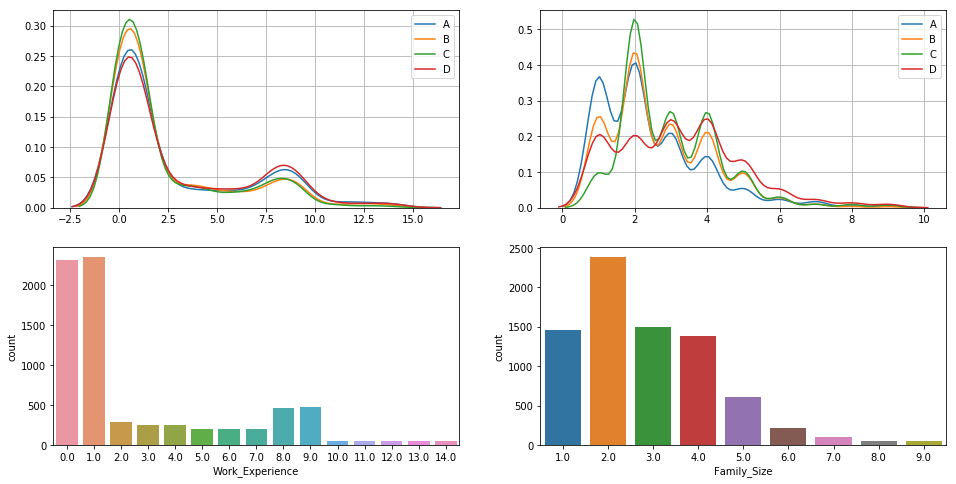

In [69]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.kdeplot(trMod[trMod['Segmentation'] == 1]['Work_Experience'].dropna(), label = 'A')
sns.kdeplot(trMod[trMod['Segmentation'] == 2]['Work_Experience'].dropna(), label = 'B')
sns.kdeplot(trMod[trMod['Segmentation'] == 3]['Work_Experience'].dropna(), label = 'C')
sns.kdeplot(trMod[trMod['Segmentation'] == 4]['Work_Experience'].dropna(), label = 'D')
plt.grid(True)

plt.subplot(2,2,2)
sns.kdeplot(trMod[trMod['Segmentation'] == 1]['Family_Size'].dropna(), label = 'A')
sns.kdeplot(trMod[trMod['Segmentation'] == 2]['Family_Size'].dropna(), label = 'B')
sns.kdeplot(trMod[trMod['Segmentation'] == 3]['Family_Size'].dropna(), label = 'C')
sns.kdeplot(trMod[trMod['Segmentation'] == 4]['Family_Size'].dropna(), label = 'D')
plt.grid(True)


plt.subplot(2,2,3)
sns.countplot(trMod['Work_Experience'].dropna())

plt.subplot(2,2,4)
sns.countplot(trMod['Family_Size'])

- On the plot for Work_Experience, it can be seen that the patterns are quite similar between each Segmentation. The peak can be seen the most within the 0 and 1 value, then it is constant until the value 8 and 9. From 10 to the rest, is quite a low count.

- In Family_Size plot, it can be seen that Segmentation C has the lowest user number in Family_Size of 1 compare to the other Segmentations. However, in the highest frequency of Family_Size which is 2, it can be seen that Segmentation C has the most user. A high frequency of Segmentation A seems to be found in Family Size of 1, whereas it's the lowest in Family_Size of 4. 

- From this, we can conclude that perhaps the feature Family_Size has a certain influence towards the Segmentations. Whereas the Work_Experience doesn't contribute as significant as Family_Size. However, we must evaluate more to confirm this hypothesis.

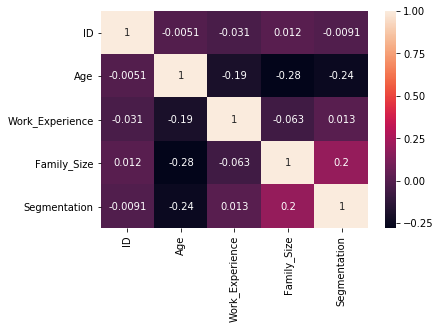

In [70]:
sns.heatmap(trMod.corr(), annot=True)

In [73]:
len(trMod.columns)

11

In [13]:
dfTr['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [14]:
dfTr['Family_Size'].value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

In [15]:
dfTr.groupby('Segmentation')['Profession'].value_counts()

# Need to create chart to see the patterns

Segmentation  Profession   
A             Artist            558
              Entertainment     365
              Engineer          259
              Doctor            199
              Lawyer            197
              Executive         125
              Healthcare        106
              Homemaker          73
              Marketing          57
B             Artist            756
              Entertainment     221
              Engineer          189
              Executive         183
              Lawyer            158
              Doctor            143
              Healthcare        101
              Homemaker          55
              Marketing          30
C             Artist           1065
              Executive         175
              Entertainment     148
              Healthcare        146
              Doctor            140
              Lawyer            140
              Engineer           75
              Marketing          35
              Homemaker          28


Check spending score di segmentation apa, dll.

In [16]:
dfTr.groupby('Segmentation')['Spending_Score'].value_counts()

Segmentation  Spending_Score
A             Low               1358
              Average            343
              High               271
B             Low                884
              Average            590
              High               384
C             Average            903
              Low                662
              High               405
D             Low               1974
              High               156
              Average            138
Name: Spending_Score, dtype: int64

In [21]:
# Testing merging dataframes based on ID

dfAll = pd.merge(dfTs, dfTr, how='left', on='ID')
dfAll.shape

(2627, 20)